In [1]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Data preparation
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes."""

# Clean data
sentences = sentences.lower().replace('.', '')
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [3]:
# Generate training data
data = []
context_size = 2
for i in range(context_size, len(words) - context_size):
    context = [words[i - j] for j in range(context_size, 0, -1)] + \
              [words[i + j] for j in range(1, context_size + 1)]
    target = words[i]
    data.append((context, target))

In [4]:
# Prepare X_train and y_train
X_train = []
y_train = []
for context, target in data:
    context_indices = [word_to_ix[w] for w in context]
    X_train.append(context_indices)
    y_train.append(word_to_ix[target])

X_train = np.array(X_train)
y_train = to_categorical(y_train, num_classes=vocab_size)

In [5]:
# Define the CBOW model with GlobalAveragePooling1D
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=4))  # Increase embedding dimensions
model.add(GlobalAveragePooling1D())  # Pooling layer to replace Lambda mean
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

C:\Users\C1QUEROR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, verbose=0)  # Increased epochs for better learning

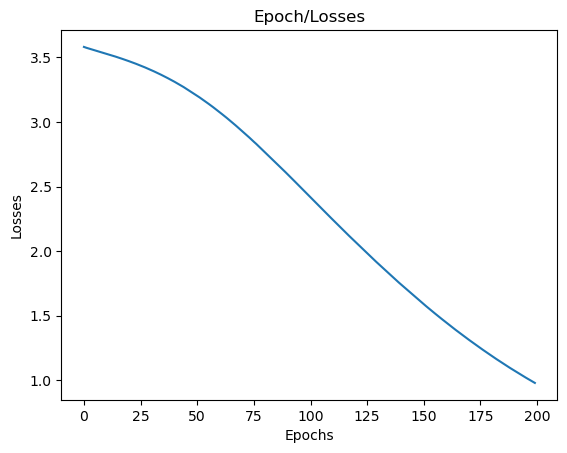

In [7]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Epoch/Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.show()

In [8]:
# Update the predict function to make use of the trained model
def predict(words):
    # Convert context words to indices
    context_idxs = np.array([word_to_ix.get(w, 0) for w in words])  # Default to 0 if word not found
    context_idxs = context_idxs.reshape(1, -1)  # Reshape for model input (batch_size=1)
    
    # Predict using the trained model
    preds = model.predict(context_idxs, verbose=0)
    word = ix_to_word[np.argmax(preds[0])]  # Get the word with the highest probability
    
    return word

In [10]:
# Test the updated predict function with example input
print("Predicted word for context ['we', 'are', 'to', 'study']:", predict(['we', 'are', 'to', 'study']))

Predicted word for context ['we', 'are', 'to', 'study']: about


In [11]:
# Define the accuracy function
def accuracy():
    correct_predictions = 0
    total_predictions = len(data)
    
    for context, target in data:
        predicted_word = predict(context)
        if predicted_word == target:
            correct_predictions += 1
    
    return correct_predictions / total_predictions

# Calculate and print accuracy
print("Model accuracy:", accuracy())

Model accuracy: 1.0
